<a href="https://colab.research.google.com/github/murnawan91/Proyek-Analisis-Data-E-Commerce/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Murnawan
- **Email:** murnawan91@gmail.com
- **ID Dicoding:** murnawan

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Analisis Kinerja Produk
> Bagaimana performa produk-produk dalam berbagai kategori? Apakah ada kategori produk yang memiliki penjualan lebih tinggi dibandingkan dengan yang lain?



- Pertanyaan 2: Evaluasi Layanan Pengiriman
> Bagaimana kualitas layanan pengiriman yang diberikan? Apakah ada waktu pengiriman yang sering melebihi estimasi?


- Pertanyaan 3: Segmentasi Pelanggan
> Bagaimana karakteristik dan perilaku pelanggan yang berbeda? Apakah ada korelasi antara lokasi pelanggan dengan jenis produk yang dibeli?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [26]:
# Mengunduh dataset
orders = pd.read_csv('/content/sample_data/orders_dataset.csv')
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [27]:
order_items = pd.read_csv('/content/sample_data/order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [28]:
products = pd.read_csv('/content/sample_data/products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [29]:
product_category = pd.read_csv('/content/sample_data/product_category_name_translation.csv')
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [30]:
customers = pd.read_csv('/content/sample_data/customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Assessing Data

In [31]:
orders.info()
orders.isna().sum()
print("Jumlah duplikasi: ", orders.duplicated().sum())
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [32]:
order_items.info()
order_items.isna().sum()
print("Jumlah duplikasi: ", order_items.duplicated().sum())
order_items.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [33]:
products.info()
products.isna().sum()
print("Jumlah duplikasi: ", products.duplicated().sum())
products.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [34]:
product_category.info()
product_category.isna().sum()
print("Jumlah duplikasi: ", product_category.duplicated().sum())
product_category.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [35]:
customers.info()
customers.isna().sum()
print("Jumlah duplikasi: ", customers.duplicated().sum())
customers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Cleaning Data

Memperbaiki Tabel **`Orders`**

In [37]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [52]:
print("Jumlah duplikasi: ", orders.duplicated().sum())

Jumlah duplikasi:  0


Memperbaiki tipe data *`datetime`*

In [36]:
datetime_columns = ["order_purchase_timestamp",	"order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
    orders[column] = pd.to_datetime(orders[column])

Mengisi Nilai Hilang di kolom `order_approved_at`

In [38]:
# Mengisi nilai yang hilang di kolom order_approved_at dengan nilai terbaru sebelumnya
orders['order_approved_at'].fillna(method='ffill', inplace=True)

Mengisi Nilai yang Hilang di kolom `order_delivered_carrier_date` dan `order_delivered_customer_date`

In [39]:
# Mengisi nilai yang hilang di kolom order_delivered_carrier_date dan order_delivered_customer_date dengan tanggal order_approved_at
orders['order_delivered_carrier_date'].fillna(orders['order_approved_at'], inplace=True)
orders['order_delivered_customer_date'].fillna(orders['order_approved_at'], inplace=True)

# Menampilkan apakah masih ada nilai yang hilang setelah pengisian
print(orders.isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [53]:
print("Jumlah duplikasi: ", orders.duplicated().sum())

Jumlah duplikasi:  0


Memperbaiki Tabel **`order_items`**

In [54]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [55]:
print("Jumlah duplikasi: ", order_items.duplicated().sum())

Jumlah duplikasi:  0


Mengisi Nilai yang hilang di kolom *`seller_id`*, *`shipping_limit_date`*, *`price`*, dan *`freight_value`*

In [40]:
# Mengisi nilai yang hilang di kolom seller_id, shipping_limit_date, price, dan freight_value dengan nilai rata-rata
order_items['seller_id'].fillna(order_items['seller_id'].mode()[0], inplace=True)
order_items['shipping_limit_date'].fillna(order_items['shipping_limit_date'].mode()[0], inplace=True)
order_items['price'].fillna(order_items['price'].mean(), inplace=True)
order_items['freight_value'].fillna(order_items['freight_value'].mean(), inplace=True)

# Menampilkan apakah masih ada nilai yang hilang setelah pengisian
print(order_items.isna().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [56]:
print("Jumlah duplikasi: ", order_items.duplicated().sum())

Jumlah duplikasi:  0


Memperbaiki Tabel **`products`**

In [41]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Mengisi nilai yang hilang di kolom *`product_category_name`*, *`product_name_length`*, *`product_description_length`*, dan *`product_photos_qty`*

In [42]:
# Mengisi nilai yang hilang di kolom product_category_name, product_name_length, product_description_length, dan product_photos_qty dengan nilai yang paling umum
products['product_category_name'].fillna(products['product_category_name'].mode()[0], inplace=True)
products['product_name_lenght'].fillna(products['product_name_lenght'].mode()[0], inplace=True)
products['product_description_lenght'].fillna(products['product_description_lenght'].mode()[0], inplace=True)
products['product_photos_qty'].fillna(products['product_photos_qty'].mode()[0], inplace=True)

Mengisi nilai yang hilang di kolom *`product_weight_g`*, *`product_length_cm`*, *`product_height_cm`*, dan *`product_width_cm`*

In [43]:
# Mengisi nilai yang hilang di kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm dengan nilai rata-rata
products['product_weight_g'].fillna(products['product_weight_g'].mean(), inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].mean(), inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].mean(), inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].mean(), inplace=True)

# Menampilkan apakah masih ada nilai yang hilang setelah pengisian
print(products.isna().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [50]:
print("Jumlah duplikasi: ", products.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa Tabel **`product_category`**

In [44]:
product_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [49]:
print("Jumlah duplikasi: ", product_category.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa Tabel **`customers`**

In [47]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [48]:
print("Jumlah duplikasi: ", customers.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

### Explore DataFrame `orders`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 4   order_approved_at              99441 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns] 
 6   order_delivered_customer_date  99441 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 8   delivery_time                  99441 non-null  timedelta64[ns]
dtypes: datetime64[ns](5), object(3), timedelta64[ns](1)
memory usage: 6.8+ MB
None
                    delivery_time
count                     

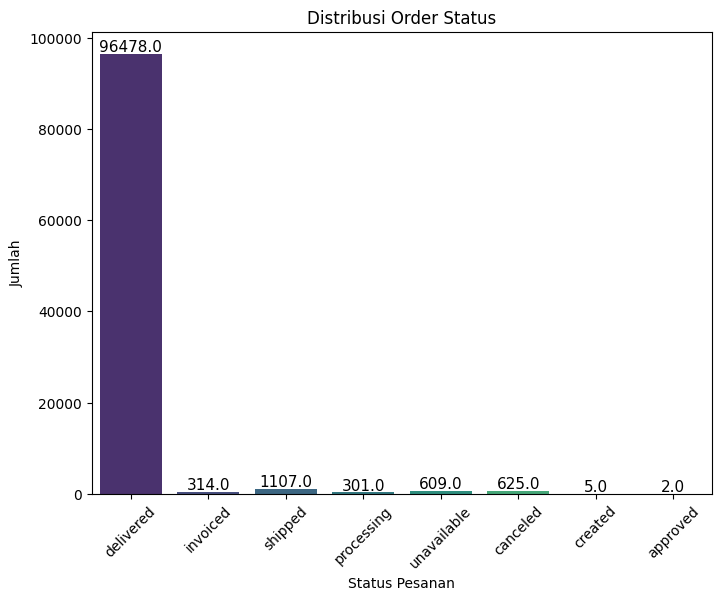

In [121]:
# Cetak informasi umum tentang dataset
print(orders.info())

# Cetak statistik deskriptif untuk kolom-kolom numerik
print(orders.describe())

# Eksplorasi distribusi kategori pada kolom order_status
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='order_status', data=orders, hue='order_status', palette='viridis', legend=False)

plt.title('Distribusi Order Status')
plt.xlabel('Status Pesanan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

# Menambahkan nilai di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


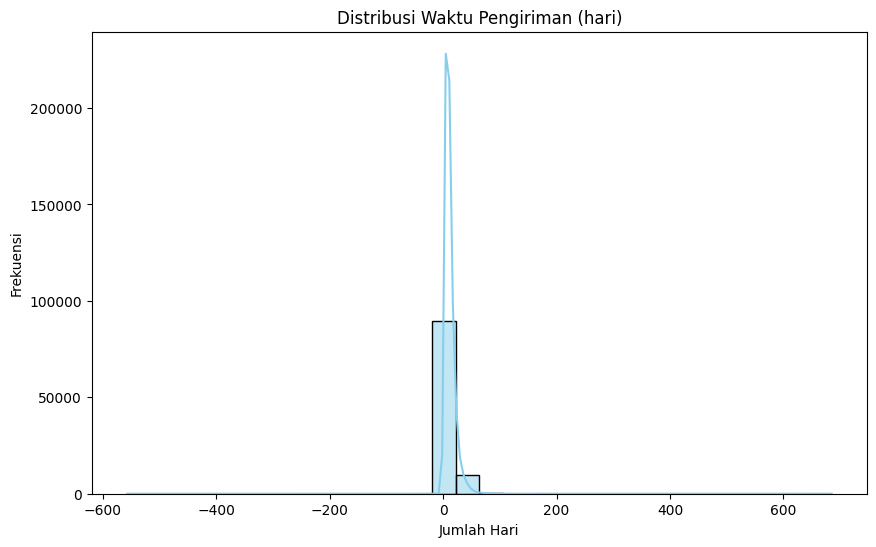

In [119]:
# Eksplorasi distribusi waktu antara order_purchase_timestamp dan order_delivered_customer_date
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['delivery_time'] = orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']

plt.figure(figsize=(10, 6))
sns.histplot(orders['delivery_time'].dt.days, bins=30, kde=True, color='skyblue')
plt.title('Distribusi Waktu Pengiriman (hari)')
plt.xlabel('Jumlah Hari')
plt.ylabel('Frekuensi')
plt.show()

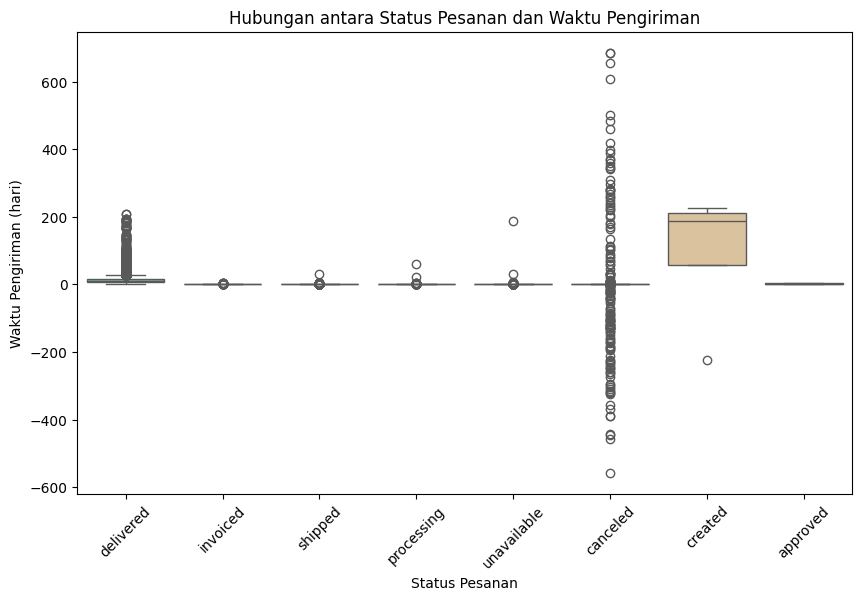

In [123]:
# Eksplorasi hubungan antara order_status dan waktu pengiriman
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='order_status', y=orders['delivery_time'].dt.days, data=orders, hue='order_status', palette='Set2')

plt.title('Hubungan antara Status Pesanan dan Waktu Pengiriman')
plt.xlabel('Status Pesanan')
plt.ylabel('Waktu Pengiriman (hari)')
plt.xticks(rotation=45)

# Menambahkan nilai di atas setiap kotak
for i in range(len(ax.artists)):
    box = ax.artists[i]
    box_x = box.get_xdata()
    box_y = box.get_ydata()
    plt.text(box_x.mean(), box_y.mean(), f"{box_y.mean():.0f}",
             ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.show()

### Explore DataFrame `order_items`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
 7   shipping_month       112650 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 6.9+ MB
None
       order_item_id          price  freight_value  shipping_month
count  112650.000000  112650.000000  112650.000000   112650.000000
mean        1.197834     120.653739      19.990320        6.115828
std         0.705124   

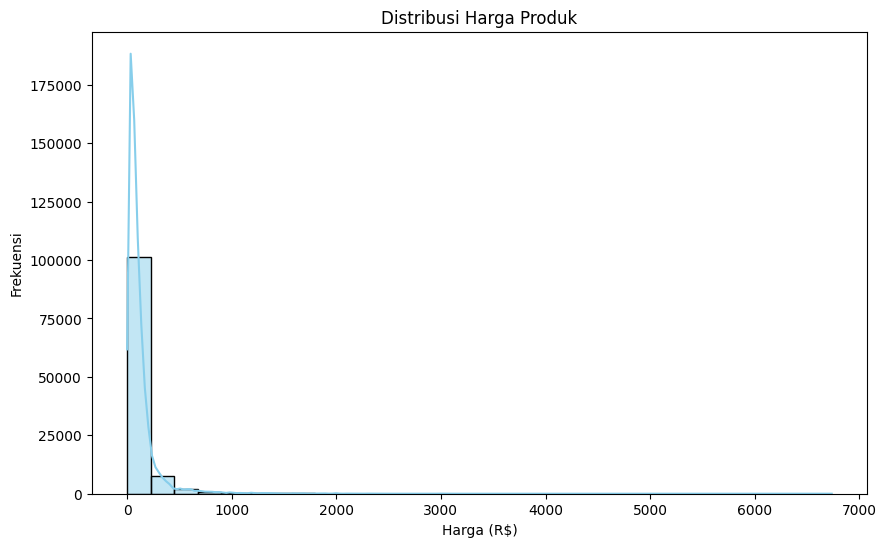

In [124]:
# Cetak informasi umum tentang dataset
print(order_items.info())

# Cetak statistik deskriptif untuk kolom-kolom numerik
print(order_items.describe())

# Eksplorasi distribusi harga produk (price)
plt.figure(figsize=(10, 6))
sns.histplot(order_items['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga (R$)')
plt.ylabel('Frekuensi')
plt.show()


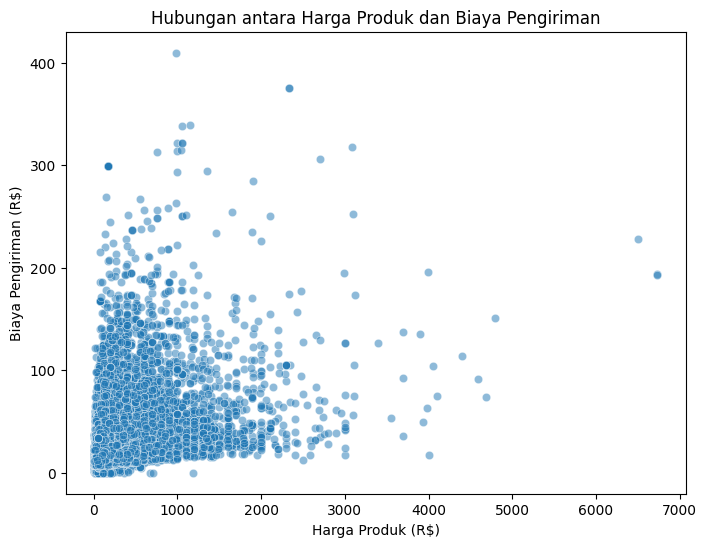

In [125]:
# Eksplorasi hubungan antara harga produk (price) dan biaya pengiriman (freight_value)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='freight_value', data=order_items, alpha=0.5)
plt.title('Hubungan antara Harga Produk dan Biaya Pengiriman')
plt.xlabel('Harga Produk (R$)')
plt.ylabel('Biaya Pengiriman (R$)')
plt.show()


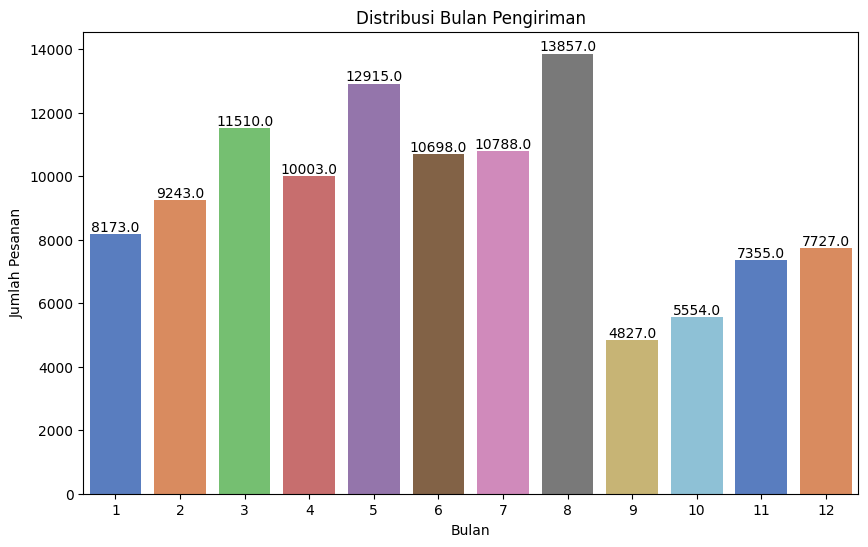

In [127]:
# Ubah kolom shipping_limit_date menjadi tipe data datetime
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])
order_items['shipping_month'] = order_items['shipping_limit_date'].dt.month

# Eksplorasi distribusi shipping_limit_date
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='shipping_month', data=order_items, hue='shipping_month', palette='muted', legend=False)

plt.title('Distribusi Bulan Pengiriman')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')

# Menambahkan nilai di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Explore DataFrame `products`

In [150]:
# Cetak informasi umum tentang dataset
print(products.info())

# Cetak statistik deskriptif untuk kolom-kolom numerik
print(products.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32951.000000                32951.000000        32951.000000   
mean             48.690267                  764.6920

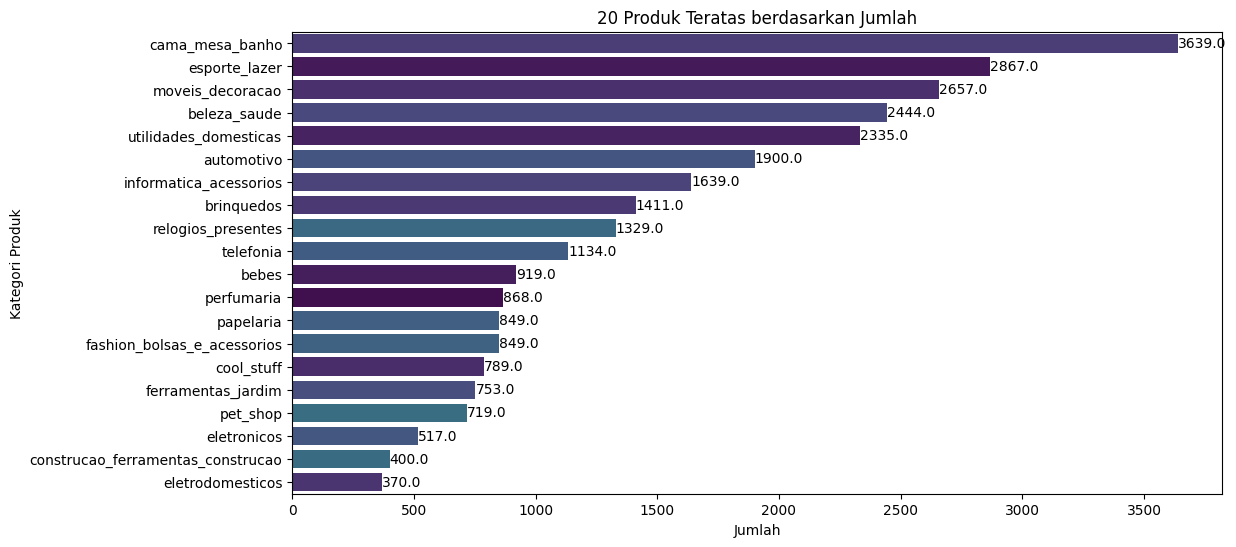

In [155]:
# Mengelompokkan data dan menghitung jumlah produk dalam setiap kategori
top_products = products['product_category_name'].value_counts().head(20)

# Eksplorasi distribusi kategori produk (product_category_name)
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='product_category_name', data=products, order=top_products.index, hue='product_category_name', palette='viridis', legend=False)
plt.title('20 Produk Teratas berdasarkan Jumlah')
plt.xlabel('Jumlah')
plt.ylabel('Kategori Produk')

# Menambahkan nilai di samping setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black')

plt.show()


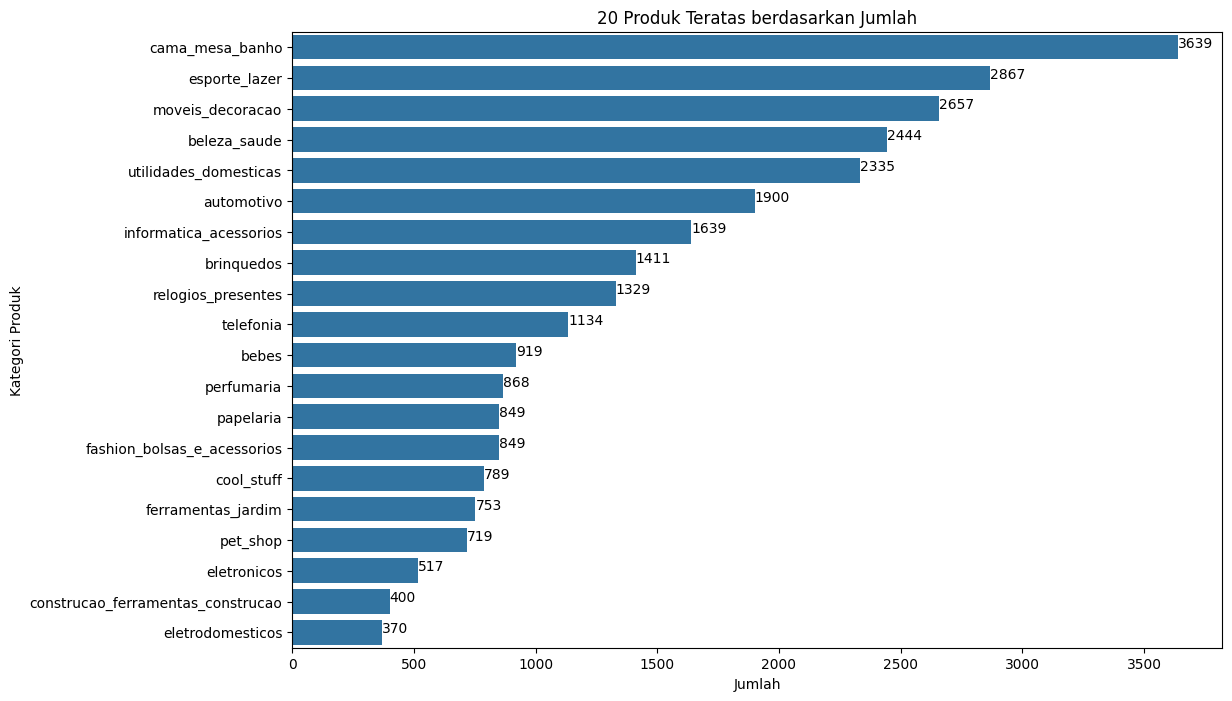

In [143]:
# Mengelompokkan data dan menghitung jumlah produk dalam setiap kategori
top_products = products['product_category_name'].value_counts().head(20)

# Membuat plot untuk 20 produk teratas
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_products.values, y=top_products.index)
plt.title('20 Produk Teratas berdasarkan Jumlah')
plt.xlabel('Jumlah')
plt.ylabel('Kategori Produk')

# Menambahkan nilai di samping setiap bar
for i, value in enumerate(top_products.values):
    ax.text(value, i, str(value), color='black', ha="left")

plt.show()


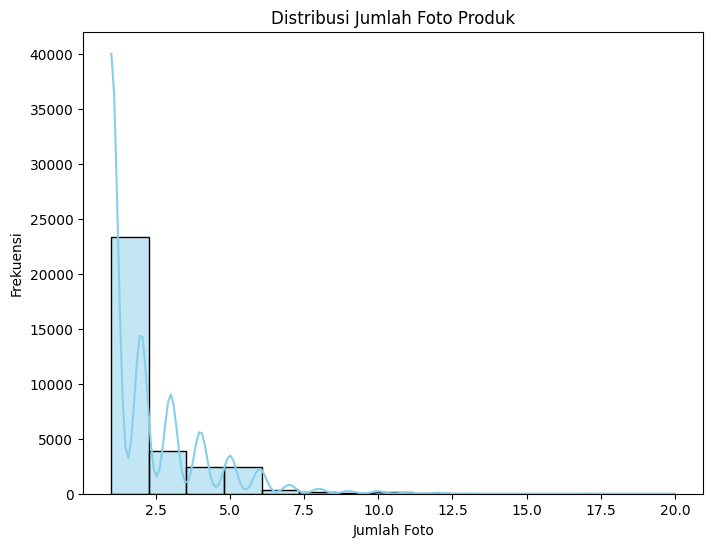

In [129]:
# Eksplorasi distribusi jumlah foto produk (product_photos_qty)
plt.figure(figsize=(8, 6))
sns.histplot(products['product_photos_qty'], bins=15, kde=True, color='skyblue')
plt.title('Distribusi Jumlah Foto Produk')
plt.xlabel('Jumlah Foto')
plt.ylabel('Frekuensi')
plt.show()

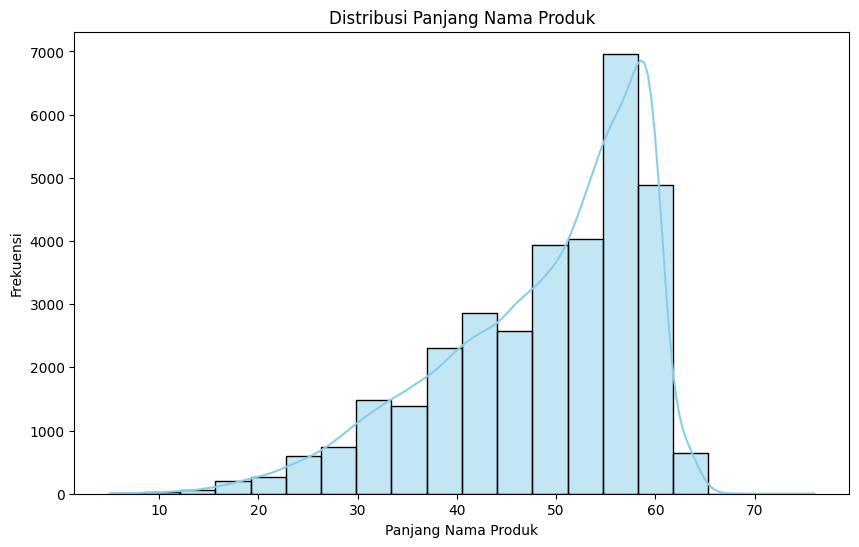

In [130]:
# Eksplorasi distribusi panjang nama produk (product_name_lenght)
plt.figure(figsize=(10, 6))
sns.histplot(products['product_name_lenght'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Panjang Nama Produk')
plt.xlabel('Panjang Nama Produk')
plt.ylabel('Frekuensi')
plt.show()


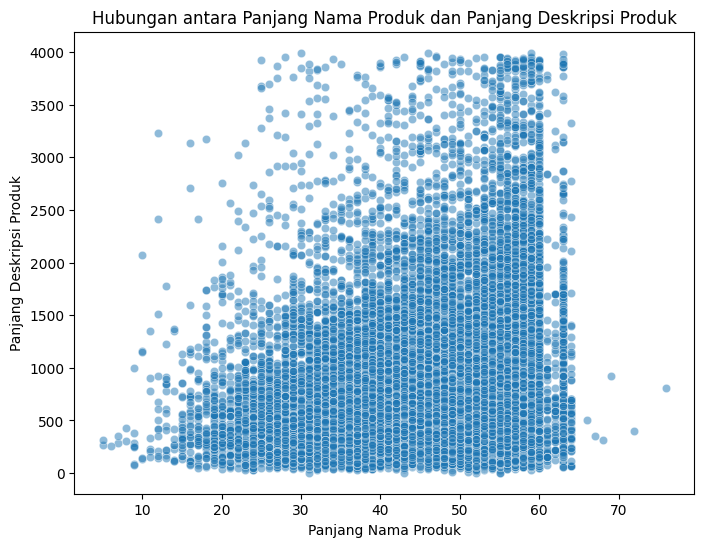

In [131]:
# Eksplorasi hubungan antara panjang nama produk (product_name_lenght) dan panjang deskripsi produk (product_description_lenght)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='product_name_lenght', y='product_description_lenght', data=products, alpha=0.5)
plt.title('Hubungan antara Panjang Nama Produk dan Panjang Deskripsi Produk')
plt.xlabel('Panjang Nama Produk')
plt.ylabel('Panjang Deskripsi Produk')
plt.show()

### Explore DataFrame `product_category`

In [144]:
# Cetak informasi umum tentang dataset
print(product_category.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


### Explore DataFrame `customers`

In [146]:
# Cetak informasi umum tentang dataset
print(customers.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


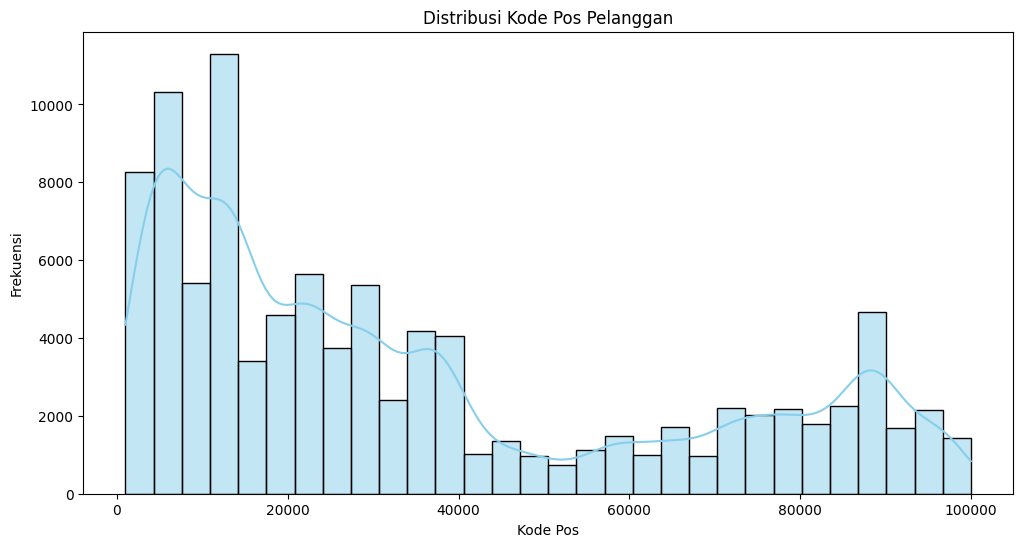

In [147]:
# Eksplorasi distribusi kode pos pelanggan (customer_zip_code_prefix)
plt.figure(figsize=(12, 6))
sns.histplot(customers['customer_zip_code_prefix'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Kode Pos Pelanggan')
plt.xlabel('Kode Pos')
plt.ylabel('Frekuensi')
plt.show()


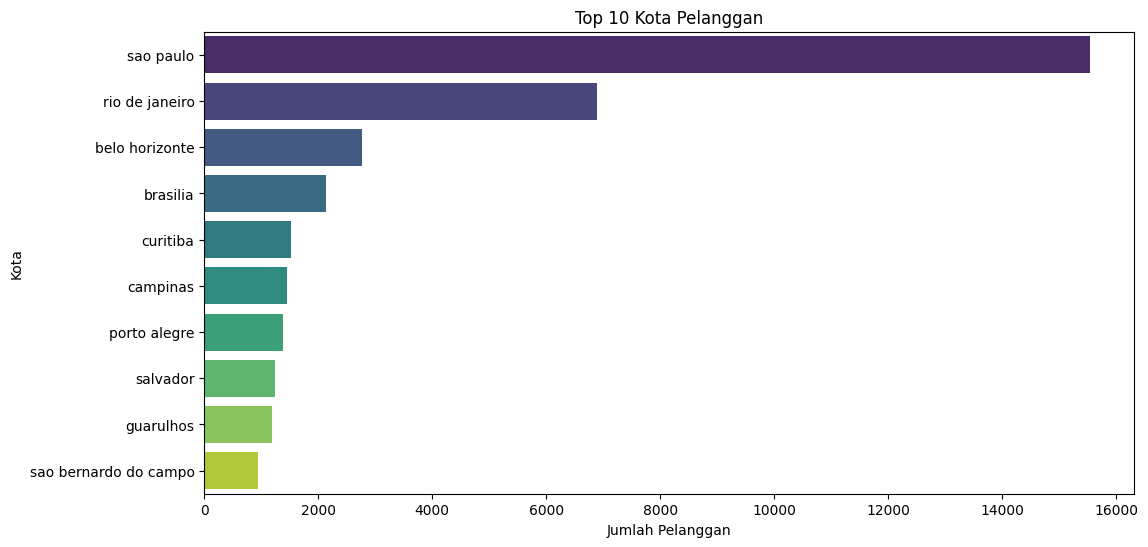

In [148]:
# Eksplorasi distribusi kota pelanggan (customer_city)
top_cities = customers['customer_city'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette='viridis', legend=False)
plt.title('Top 10 Kota Pelanggan')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Kota')
plt.show()


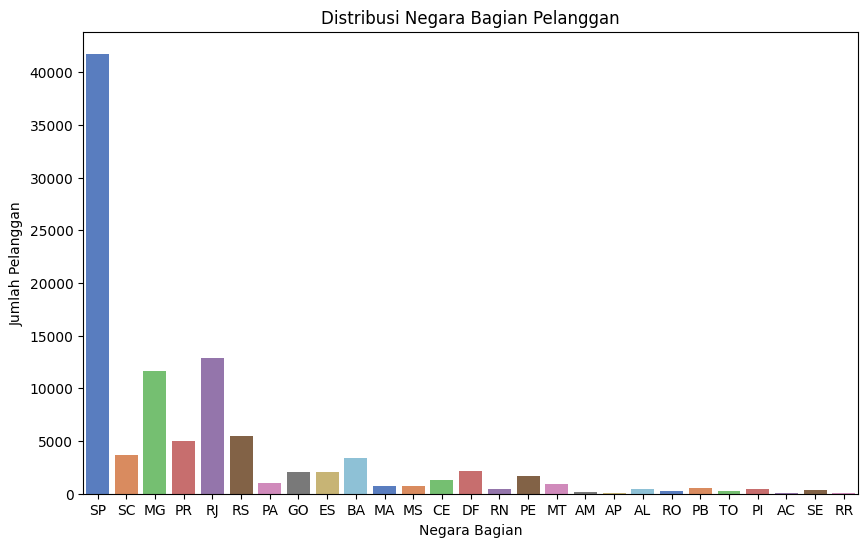

In [149]:
# Eksplorasi distribusi negara bagian pelanggan (customer_state)
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_state', data=customers, hue='customer_state', palette='muted', legend=False)
plt.title('Distribusi Negara Bagian Pelanggan')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Pelanggan')
plt.show()

### Explore Menggabungkan DataFrame `orders` dan `order_items`

In [63]:
# Menggabungkan orders dan order_items berdasarkan 'order_id'
orders_orderItem = pd.merge(orders, order_items, on='order_id', how='inner')
orders_orderItem.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,2


### Explore Menggabungkan DataFrame `orders`, `order_items` dan `customers`

In [64]:
orders_customers = pd.merge(left=orders_orderItem, right=customers, how="left", left_on="customer_id", right_on="customer_id" )
orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,7,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,8,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,11,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,2,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [67]:
orders_customers.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15402
rio de janeiro            6834
belo horizonte            2750
brasilia                  2116
curitiba                  1510
campinas                  1429
porto alegre              1372
salvador                  1238
guarulhos                 1178
sao bernardo do campo      928
Name: order_id, dtype: int64

In [68]:
orders_customers.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41375
RJ    12762
MG    11544
RS     5432
PR     4998
SC     3612
BA     3358
DF     2125
ES     2025
GO     2007
PE     1648
CE     1327
PA      970
MT      903
MA      740
MS      709
PB      532
PI      493
RN      482
AL      411
SE      345
TO      279
RO      247
AM      147
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

### Explore Menggabungkan DataFrame `order_items` dan `products`

In [70]:
# Menggabungkan order_items dengan products berdasarkan 'product_id'
orderItem_product = pd.merge(order_items, products, on='product_id', how='inner')
orderItem_product.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_month,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,9,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,7,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,5,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,8,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,8,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


### Explore Menggabungkan DataFrame `products` dan `product_category`

In [71]:
# Menggabungkan products dan product_category berdasarkan 'product_category_name'
products_productCategory = pd.merge(products, product_category, on='product_category_name', how='inner')
products_productCategory.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


### Explore Menggabungkan Seluruh DataFrame

In [76]:
# Merge data
merged_data = orders.merge(order_items, on='order_id', how='inner') \
                    .merge(products, on='product_id', how='inner') \
                    .merge(product_category, on='product_category_name', how='inner') \
                    .merge(customers, on='customer_id', how='inner')

merged_data.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,1,...,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,2 days 20:15:12,1,...,4.0,500.0,19.0,8.0,13.0,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,5 days 00:05:14,1,...,4.0,500.0,19.0,8.0,13.0,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,14 days 18:38:13,1,...,4.0,500.0,19.0,8.0,13.0,housewares,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC
4,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,33 days 21:31:35,1,...,6.0,14300.0,38.0,34.0,34.0,housewares,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP


Menyimpan Hasil Penggabungan pada file CSV yang baru

In [73]:
# Simpan ke dalam file CSV
merged_data.to_csv('all_merge_data.csv', index=False)

## Visualization & Explanatory Analysis

In [77]:
all_data = pd.read_csv('/content/all_merge_data.csv')

### Pertanyaan 1: Bagaimana performa produk-produk dalam berbagai kategori?

Cara: Menghitung total penjualan dan rata-rata harga produk per kategori

In [80]:
# Hitung total penjualan dan rata-rata harga produk per kategori
category_performance = all_data.groupby('product_category_name_english').agg({
    'order_item_id': 'sum',    # Jumlah produk terjual
    'price': 'mean'             # Rata-rata harga
}).reset_index()

# Sorting berdasarkan total penjualan
category_performance = category_performance.sort_values(by='order_item_id', ascending=False)

Membuat Visual Total Penjualan per Kategori Produk

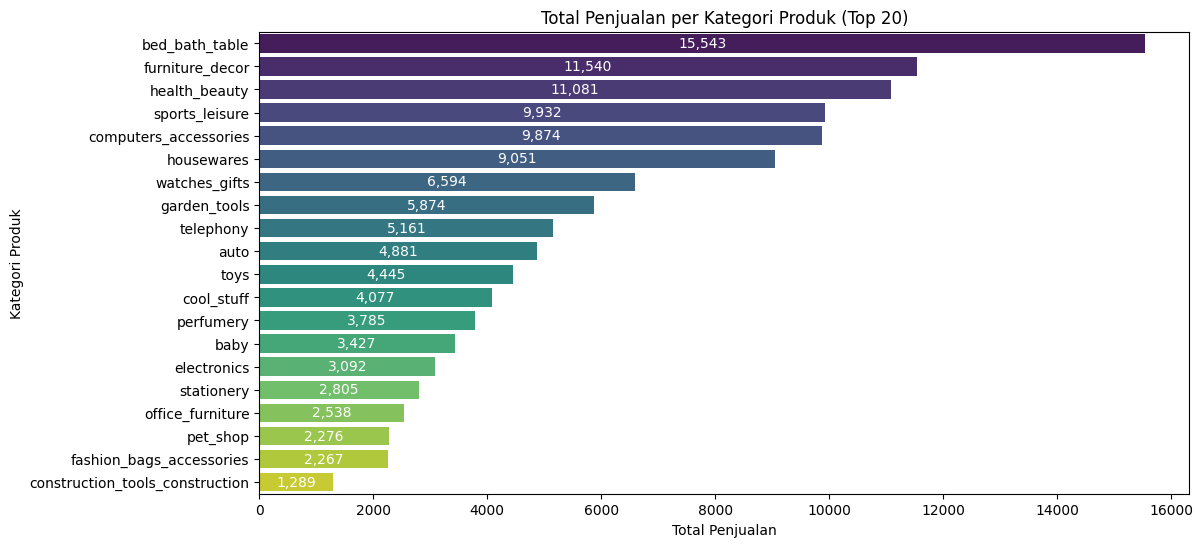

In [82]:
# Visualisasi total penjualan per kategori produk
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='order_item_id', y='product_category_name_english', data=category_sales[:20], hue='product_category_name_english', palette='viridis', dodge=False)
plt.title('Total Penjualan per Kategori Produk (Top 20)')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori Produk')

# Menambahkan data di dalam setiap bar
for bar in bars.patches:
    # plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width()):,}', ha='left', va='center', color='black', fontsize=10)
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width()):,}', ha='center', va='center', color='white')

plt.show()

Membuat Visualisasi rata-rata Harga Produk per Kategori

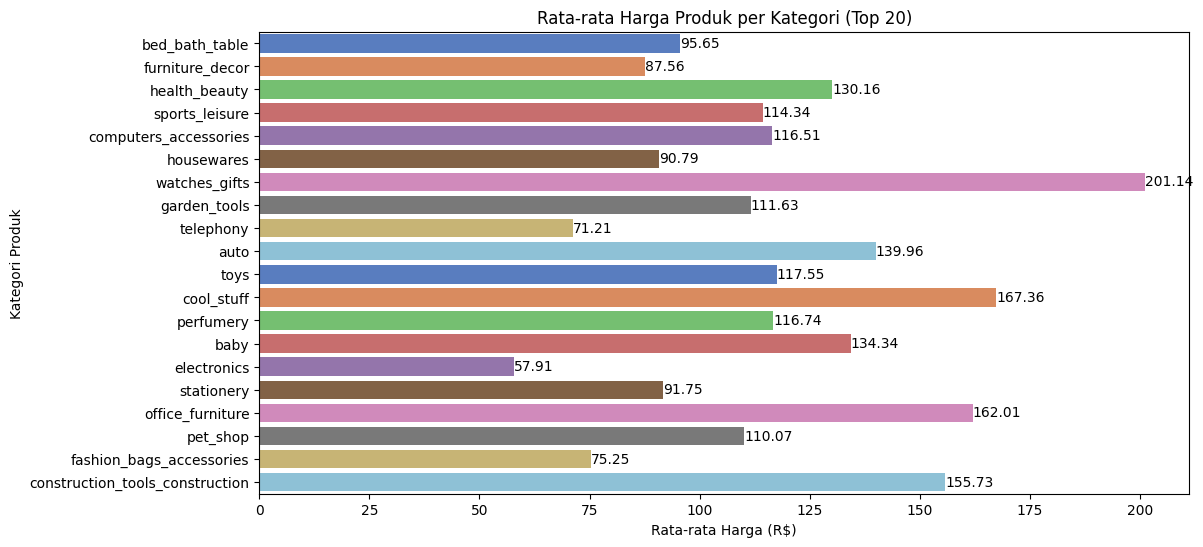

In [84]:
# Visualisasi rata-rata harga produk per kategori
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='price', y='product_category_name_english', data=category_performance[:20], hue='product_category_name_english', palette='muted', dodge=False)
plt.title('Rata-rata Harga Produk per Kategori (Top 20)')
plt.xlabel('Rata-rata Harga (R$)')
plt.ylabel('Kategori Produk')

# Menambahkan nilai data di dalam setiap bar
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', ha='left', va='center', color='black', fontsize=10)

plt.show()

### Pertanyaan 2: Bagaimana kualitas layanan pengiriman yang diberikan? Apakah ada waktu pengiriman yang sering melebihi estimasi?

Cara: Melakukan analisis terhadap waktu pengiriman yang telah tercatat dalam dataset

In [87]:
# Konversi kolom tanggal menjadi tipe datetime
all_data['order_delivered_customer_date'] = pd.to_datetime(all_data['order_delivered_customer_date'])
all_data['order_estimated_delivery_date'] = pd.to_datetime(all_data['order_estimated_delivery_date'])

# Hitung waktu pengiriman
all_data['delivery_time'] = (all_data['order_delivered_customer_date'] - all_data['order_estimated_delivery_date']).dt.days

# Identifikasi waktu pengiriman yang melebihi estimasi
all_data['delivery_delayed'] = all_data['delivery_time'] > 0

# Analisis kualitas layanan pengiriman
delivery_quality = all_data['delivery_delayed'].value_counts(normalize=True) * 100



Visualisasi

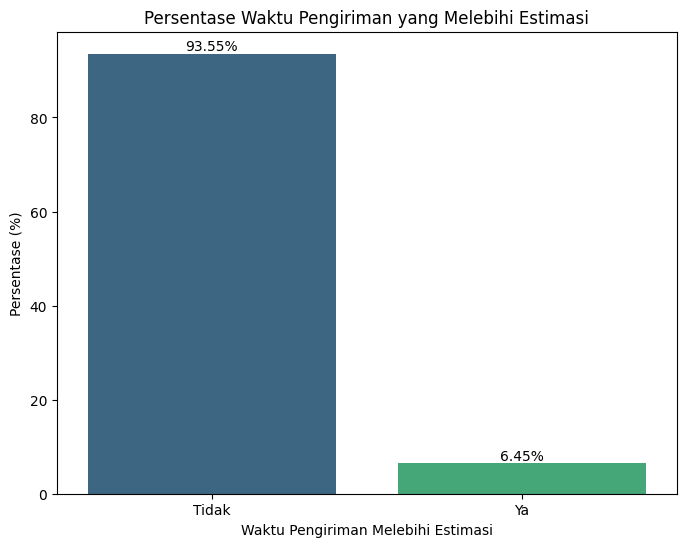

In [88]:
# Visualisasi
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=delivery_quality.index, y=delivery_quality.values, hue=delivery_quality.index, palette='viridis', legend=False)
plt.title('Persentase Waktu Pengiriman yang Melebihi Estimasi')
plt.xlabel('Waktu Pengiriman Melebihi Estimasi')
plt.ylabel('Persentase (%)')

# Menambahkan nilai pada setiap bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}%', ha='center', va='bottom')

plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.show()

Visualisasi Distribusi Waktu Pengiriman

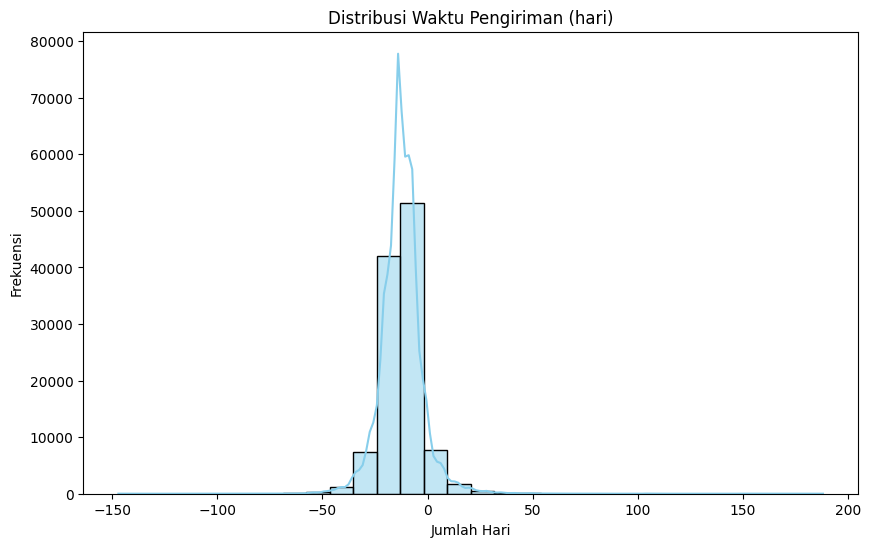

In [89]:
# Distribusi waktu pengiriman
plt.figure(figsize=(10, 6))
sns.histplot(all_data['delivery_time'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Waktu Pengiriman (hari)')
plt.xlabel('Jumlah Hari')
plt.ylabel('Frekuensi')
plt.show()

Grafik diatas adalah histogram yang menunjukkan distribusi waktu pengiriman dalam satuan hari.

Histogram tersebut dibagi menjadi beberapa batang (bins) yang mewakili rentang waktu pengiriman, dan tinggi setiap batang menunjukkan frekuensi atau jumlah pesanan yang terjadi pada rentang waktu tersebut.

Grafik ini memberikan gambaran tentang sebaran atau distribusi waktu pengiriman produk kepada pelanggan. Jumlah hari di sumbu ***x*** menunjukkan berapa lama waktu yang dibutuhkan untuk mengirimkan produk, sedangkan frekuensi di sumbu ***y*** menunjukkan berapa sering rentang waktu tersebut terjadi dalam data yang diamati.

Semakin tinggi batang pada histogram, semakin sering waktu pengiriman berada dalam rentang tersebut.

### Pertanyaan 3: Bagaimana karakteristik dan perilaku pelanggan yang berbeda? Apakah ada korelasi antara lokasi pelanggan dengan jenis produk yang dibeli?

Cara:
1.   Analisis Pembelian Berdasarkan Produk
2.   Analisis Kesetiaan Pelanggan
3.   Korelasi antara Lokasi dan Jenis Produk



In [90]:
# 1. Segmentasi Pelanggan (contoh menggunakan RFM)
# Analisis Recency
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])
recent_date = all_data['order_purchase_timestamp'].max()
all_data['recency'] = (recent_date - all_data['order_purchase_timestamp']).dt.days

# Analisis Frequency
frequency = all_data.groupby('customer_id')['order_id'].count().reset_index()
frequency.columns = ['customer_id', 'frequency']

# Analisis Monetary
monetary = all_data.groupby('customer_id')['price'].sum().reset_index()
monetary.columns = ['customer_id', 'monetary']

# Gabungkan hasil RFM metrics
rfm_data = pd.merge(pd.merge(frequency, monetary, on='customer_id'), all_data[['customer_id', 'recency']], on='customer_id')

# 2. Analisis Pembelian Berdasarkan Lokasi
# Jumlah pembelian per negara bagian
purchase_by_state = all_data.groupby('customer_state')['order_id'].count().reset_index().sort_values(by='order_id', ascending=False)

# 3. Korelasi antara Lokasi dan Jenis Produk
# Analisis pembelian berdasarkan kategori produk dan negara bagian
purchase_by_category_and_state = all_data.groupby(['customer_state', 'product_category_name_english'])['order_id'].count().reset_index()


Visualisasi Analisis Pembelian Berdasarkan Lokasi

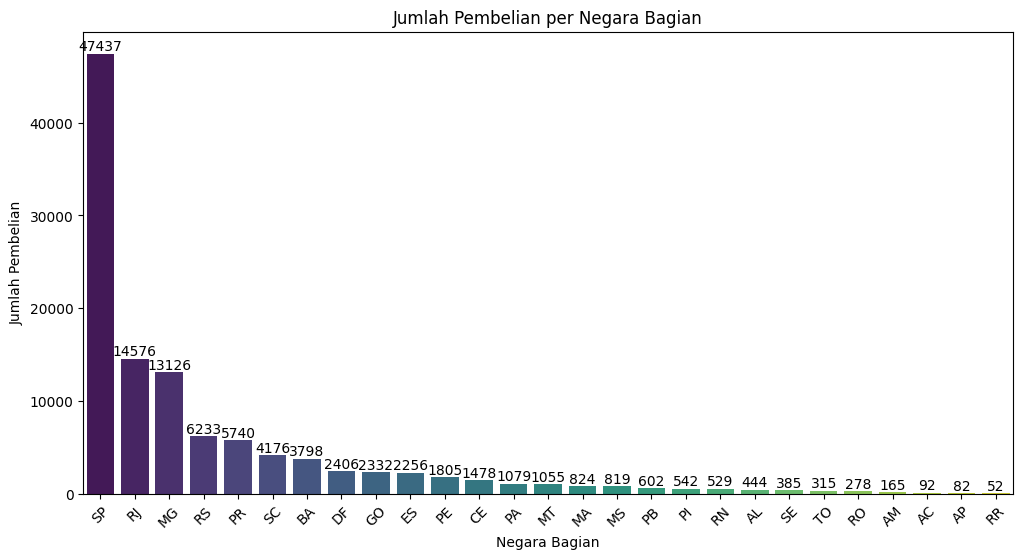

In [92]:
# Analisis Pembelian Berdasarkan Lokasi
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='customer_state', y='order_id', data=purchase_by_state, hue='customer_state', palette='viridis', dodge=False)
plt.title('Jumlah Pembelian per Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)

# Menampilkan nilai pada setiap bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom')

plt.show()

Analisis Kesetiaan Pelanggan

In [94]:
# Analisis kesetiaan pelanggan
loyal_customers = all_data.groupby('customer_id').filter(lambda x: len(x) > 1)

# Identifikasi pelanggan yang telah melakukan pembelian berulang
repeat_customers = loyal_customers['customer_id'].unique()

# Hitung jumlah pelanggan yang setia
loyal_customer_count = len(repeat_customers)
total_customer_count = len(all_data['customer_id'].unique())

loyalty_rate = (loyal_customer_count / total_customer_count) * 100

print(f"Jumlah Pelanggan Setia: {loyal_customer_count}")
print(f"Total Pelanggan: {total_customer_count}")
print(f"Tingkat Kesetiaan Pelanggan: {loyalty_rate:.2f}%")

# Analisis pola pembelian pelanggan setia
loyal_customer_data = all_data[all_data['customer_id'].isin(repeat_customers)]

# Statistik pola pembelian
purchase_frequency = loyal_customer_data.groupby('customer_id')['order_id'].count().mean()
average_purchase_value = loyal_customer_data.groupby('customer_id')['price'].mean().mean()
average_order_interval = (loyal_customer_data.groupby('customer_id')['order_purchase_timestamp'].max() - loyal_customer_data.groupby('customer_id')['order_purchase_timestamp'].min()).mean()

print(f"Frekuensi Pembelian Rata-rata: {purchase_frequency}")
print(f"Rata-rata Nilai Pembelian: {average_purchase_value}")
print(f"Interval Rata-rata antara Pembelian: {average_order_interval}")

Jumlah Pelanggan Setia: 9800
Total Pelanggan: 98645
Tingkat Kesetiaan Pelanggan: 9.93%
Frekuensi Pembelian Rata-rata: 2.4266326530612243
Rata-rata Nilai Pembelian: 85.49529603918191
Interval Rata-rata antara Pembelian: 0 days 00:00:00


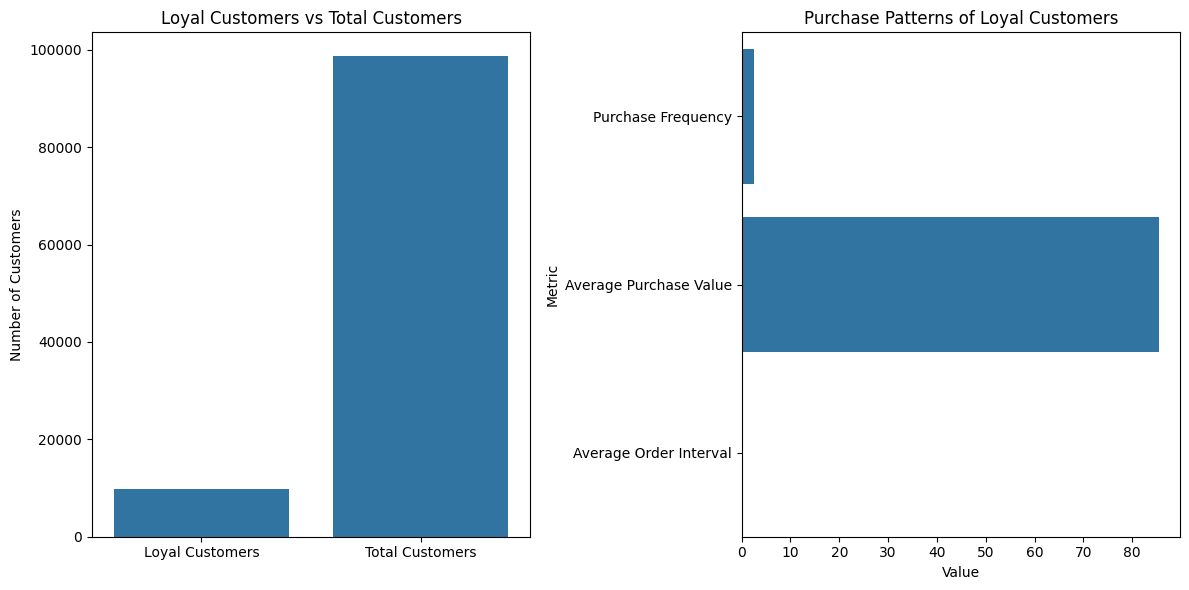

In [103]:
# Analisis kesetiaan pelanggan
# Visualisasi
plt.figure(figsize=(12, 6))

# Jumlah Pelanggan Setia vs Total Pelanggan
plt.subplot(1, 2, 1)
sns.barplot(x=['Loyal Customers', 'Total Customers'], y=[loyal_customer_count, total_customer_count])
plt.title('Loyal Customers vs Total Customers')
plt.ylabel('Number of Customers')

# Statistik Pola Pembelian Pelanggan Setia
plt.subplot(1, 2, 2)
stats_data = {
    'Metric': ['Purchase Frequency', 'Average Purchase Value', 'Average Order Interval'],
    'Value': [purchase_frequency, average_purchase_value, average_order_interval.days]
}
stats_df = pd.DataFrame(stats_data)
sns.barplot(x='Value', y='Metric', data=stats_df)
plt.title('Purchase Patterns of Loyal Customers')
plt.xlabel('Value')
plt.ylabel('Metric')

plt.tight_layout()
plt.show()

Korelasi Antara Lokasi dan Jenis Produk

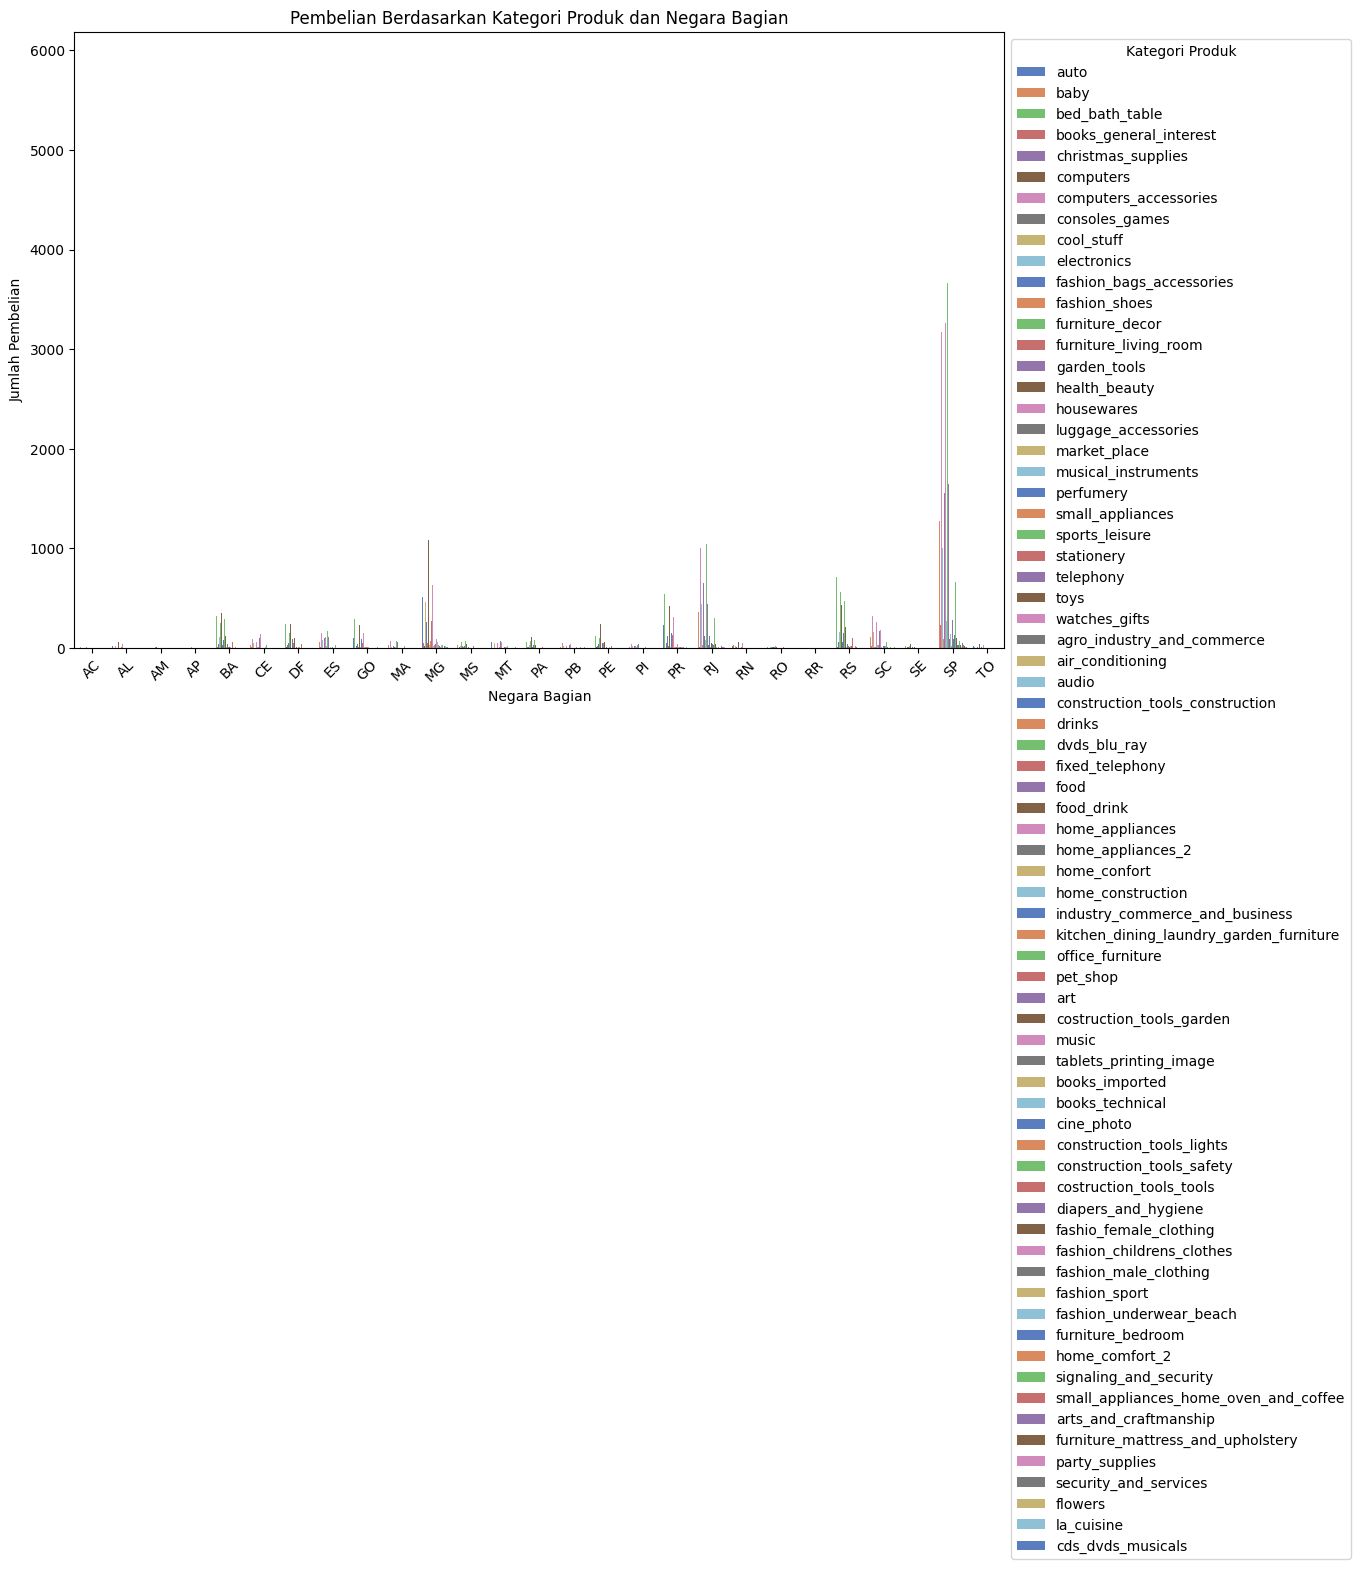

In [93]:
# Korelasi antara Lokasi dan Jenis Produk
plt.figure(figsize=(12, 8))
sns.barplot(x='customer_state', y='order_id', hue='product_category_name_english', data=purchase_by_category_and_state, palette='muted')
plt.title('Pembelian Berdasarkan Kategori Produk dan Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.legend(title='Kategori Produk', bbox_to_anchor=(1, 1))
plt.show()

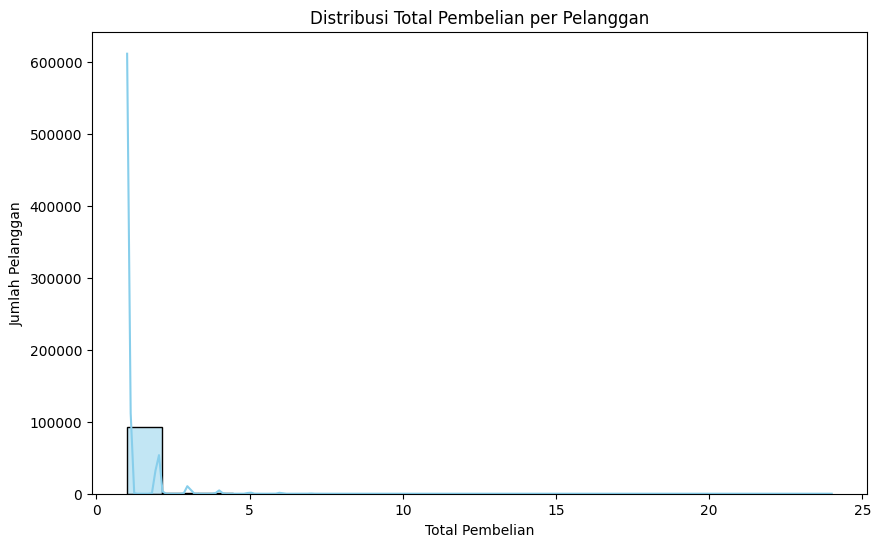

In [15]:
# Analisis segmentasi pelanggan berdasarkan total pembelian
customer_purchase = all_data.groupby('customer_unique_id')['order_id'].count().reset_index()
customer_purchase = customer_purchase.rename(columns={'order_id': 'total_purchases'})

plt.figure(figsize=(10, 6))
sns.histplot(customer_purchase['total_purchases'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Total Pembelian per Pelanggan')
plt.xlabel('Total Pembelian')
plt.ylabel('Jumlah Pelanggan')
plt.show()

## RFM Analysis

In [104]:
# Mengonversi kolom order_purchase_timestamp ke tipe data datetime
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

# Menghitung tanggal terbaru dalam dataset untuk menghitung Recency
latest_date = max(all_data['order_purchase_timestamp'])

# Membuat DataFrame RFM
rfm_df = all_data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'price': 'sum'        # Monetary Value
}).reset_index()

# Mengganti nama kolom agar sesuai dengan RFM
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Menampilkan lima data teratas dari RFM DataFrame
print(rfm_df.head())

                         CustomerID  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1    129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     18.90
2  0000f46a3911fa3c0805444483337064      541          1     69.00
3  0000f6ccb0745a6a4b88665a16c9f078      325          1     25.99
4  0004aac84e0df4da2b147fca70cf8255      292          1    180.00


In [105]:
# Menghitung quartile untuk setiap metrik RFM
quartiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.25, 0.5, 0.75])

# Fungsi untuk menentukan quartile kategori
def r_score(x):
    if x <= quartiles['Recency'][0.25]:
        return 4
    elif x <= quartiles['Recency'][0.50]:
        return 3
    elif x <= quartiles['Recency'][0.75]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quartiles[c][0.25]:
        return 1
    elif x <= quartiles[c][0.50]:
        return 2
    elif x <= quartiles[c][0.75]:
        return 3
    else:
        return 4

# Menghitung quartile kategori untuk setiap metrik RFM
rfm_df['R'] = rfm_df['Recency'].apply(r_score)
rfm_df['F'] = rfm_df['Frequency'].apply(fm_score, args=('Frequency',))
rfm_df['M'] = rfm_df['Monetary'].apply(fm_score, args=('Monetary',))

# Menggabungkan nilai RFM untuk mendapatkan RFM score
rfm_df['RFM_Score'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# Penamaan segmen berdasarkan RFM score
segment_dict = {
    '111': 'Best Customers',
    '311': 'Loyal Customers',
    '411': 'Big Spenders',
    '444': 'Lost Cheap Customers',
    '144': 'Almost Lost',
    '344': 'Recent Customers',
    '244': 'High-Spending New Customers',
    '133': 'Lowest Activity',
    '333': 'Mid-Spending Customers',
    '233': 'Low-Spending New Customers'
}

# Mapping segmen berdasarkan RFM score
rfm_df['Segment'] = rfm_df['RFM_Score'].map(segment_dict)

# Menampilkan lima data teratas dari DataFrame RFM dengan segmen
print(rfm_df.head())

# Menampilkan jumlah pelanggan dalam setiap segmen
print(rfm_df['Segment'].value_counts())

                         CustomerID  Recency  Frequency  Monetary  R  F  M  \
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1    129.90  4  1  3   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     18.90  4  1  1   
2  0000f46a3911fa3c0805444483337064      541          1     69.00  1  1  2   
3  0000f6ccb0745a6a4b88665a16c9f078      325          1     25.99  2  1  1   
4  0004aac84e0df4da2b147fca70cf8255      292          1    180.00  2  1  4   

  RFM_Score       Segment  
0       413           NaN  
1       411  Big Spenders  
2       112           NaN  
3       211           NaN  
4       214           NaN  
Loyal Customers                5831
Best Customers                 5810
Big Spenders                   5753
Lost Cheap Customers           1490
Recent Customers               1481
High-Spending New Customers    1373
Almost Lost                    1239
Name: Segment, dtype: int64


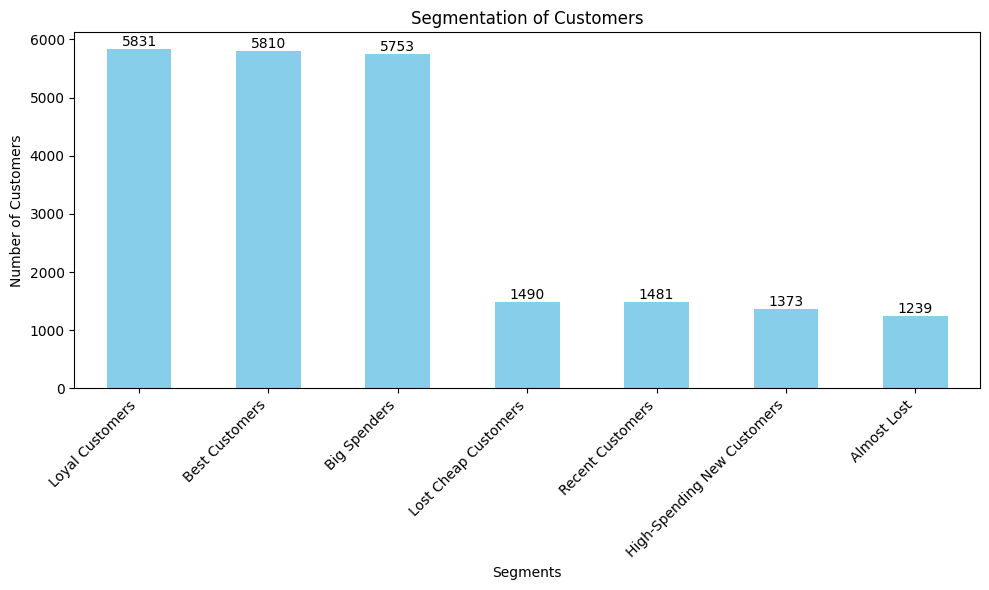

In [107]:
# Mendapatkan jumlah pelanggan dalam setiap segmen
segment_counts = rfm_df['Segment'].value_counts()

# Membuat bar plot
plt.figure(figsize=(10, 6))
bars = segment_counts.plot(kind='bar', color='skyblue')
plt.title('Segmentation of Customers')
plt.xlabel('Segments')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

# Menampilkan nilai pada setiap bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


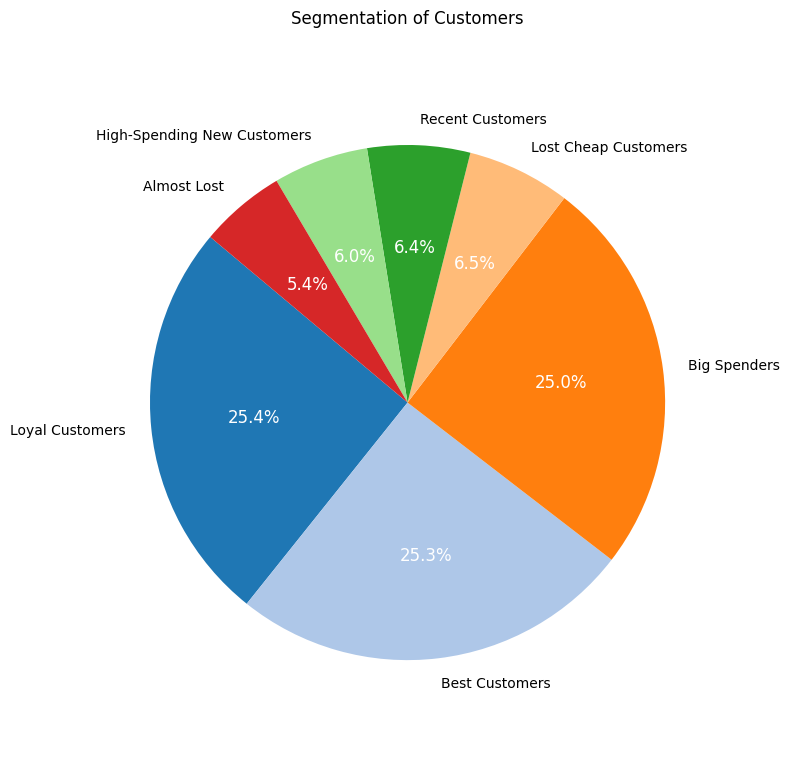

In [108]:
# Membuat pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Segmentation of Customers')

# Menampilkan nilai pada setiap bagian
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

plt.axis('equal')
plt.tight_layout()
plt.show()

Visualisasi Distribusi RFM metrics

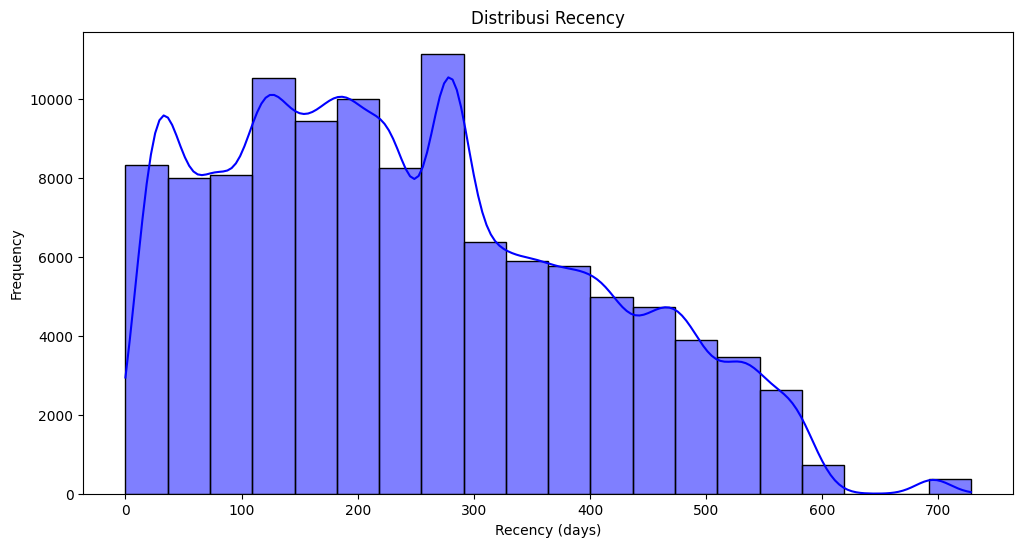

In [109]:
# Konversi kolom 'order_purchase_timestamp' menjadi tipe data datetime
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

# Pastikan recent_date adalah objek datetime yang valid
recent_date = pd.to_datetime(recent_date)

# Recency: Hitung hari terakhir pelanggan berbelanja
all_data['recency'] = (recent_date - all_data['order_purchase_timestamp']).dt.days

# Frequency: Hitung jumlah pembelian per pelanggan
frequency = all_data.groupby('customer_id')['order_id'].count().reset_index()
frequency.columns = ['customer_id', 'frequency']

# Monetary: Hitung total pembelian per pelanggan
monetary = all_data.groupby('customer_id')['price'].sum().reset_index()
monetary.columns = ['customer_id', 'monetary']

# Gabungkan hasil RFM metrics
rfm_data = pd.merge(pd.merge(frequency, monetary, on='customer_id'), all_data[['customer_id', 'recency']], on='customer_id')

# Visualisasi distribusi RFM metrics
plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['recency'], kde=True, color='blue', bins=20)
plt.title('Distribusi Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

In [19]:
# 1. Recency (R)
# Hitung tanggal terakhir pembelian
recent_date = all_data['order_purchase_timestamp'].max()

# Hitung recency untuk setiap pelanggan
rfm_recency = all_data.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
rfm_recency['recency'] = (recent_date - rfm_recency['order_purchase_timestamp']).dt.days

# 2. Frequency (F)
# Hitung jumlah pembelian untuk setiap pelanggan
rfm_frequency = all_data.groupby('customer_id')['order_id'].count().reset_index()
rfm_frequency.columns = ['customer_id', 'frequency']

# 3. Monetary (M)
# Hitung total nilai pembelian untuk setiap pelanggan
rfm_monetary = all_data.groupby('customer_id')['price'].sum().reset_index()
rfm_monetary.columns = ['customer_id', 'monetary']

# Gabungkan data RFM
rfm_data = pd.merge(pd.merge(rfm_recency, rfm_frequency, on='customer_id'), rfm_monetary, on='customer_id')

# Memberikan skor untuk Recency, Frequency, dan Monetary
# Recency Score
rfm_data['R_score'] = pd.qcut(rfm_data['recency'], q=4, labels=[4, 3, 2, 1])

# Tentukan batas bin secara manual
bin_edges = [0, 25, 50, 75, 100]  # Contoh batas bin untuk quartile

# Frequency dan Monetary Score
rfm_data['F_score'] = pd.cut(rfm_data['frequency'], bins=bin_edges, labels=[1, 2, 3, 4])
rfm_data['M_score'] = pd.cut(rfm_data['monetary'], bins=bin_edges, labels=[1, 2, 3, 4])

# Gabungkan RFM Score
rfm_data['RFM_score'] = rfm_data['R_score'].astype(str) + rfm_data['F_score'].astype(str) + rfm_data['M_score'].astype(str)

# Tampilkan hasil RFM Analysis
print(rfm_data.head())


                        customer_id order_purchase_timestamp  recency  \
0  00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26      292   
1  000161a058600d5901f007fab4c27140      2017-07-16 09:40:32      413   
2  0001fd6190edaaf884bcaf3d49edf079      2017-02-28 11:06:43      551   
3  0002414f95344307404f0ace7a26f1d5      2017-08-16 13:09:20      382   
4  000379cdec625522490c315e70c7a9fb      2018-04-02 13:42:17      153   

   frequency  monetary R_score F_score M_score RFM_score  
0          1     89.80       2       1       4       214  
1          1     54.90       1       1       3       113  
2          1    179.99       1       1     NaN     11nan  
3          1    149.90       1       1     NaN     11nan  
4          1     93.00       3       1       4       314  


## Distribusi Geografis Pelanggan

Sebaran Pelanggan per Kota

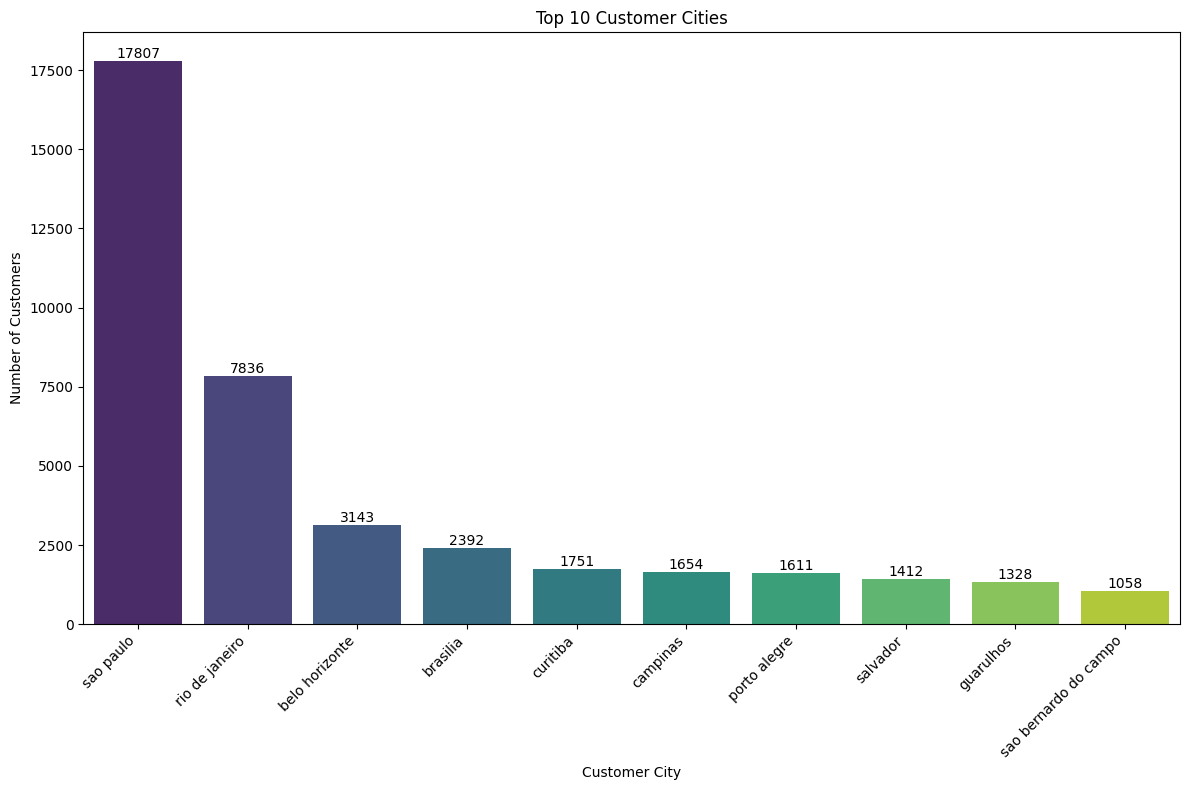

In [110]:
# Menghitung jumlah pelanggan per kota
customer_city_counts = all_data['customer_city'].value_counts().reset_index()
customer_city_counts.columns = ['Customer City', 'Number of Customers']

# Mengurutkan berdasarkan jumlah pelanggan
customer_city_counts = customer_city_counts.sort_values(by='Number of Customers', ascending=False)

# Mengambil 10 kota teratas
top_10_customer_cities = customer_city_counts.head(10)

# Visualisasi sebaran pelanggan per kota
plt.figure(figsize=(12, 8))
bars = sns.barplot(x='Customer City', y='Number of Customers', hue='Customer City', data=top_10_customer_cities, palette='viridis', legend=False)
plt.title('Top 10 Customer Cities')
plt.xlabel('Customer City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

# Menampilkan nilai pada setiap bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Sebaran Pelanggan per Negara Bagian

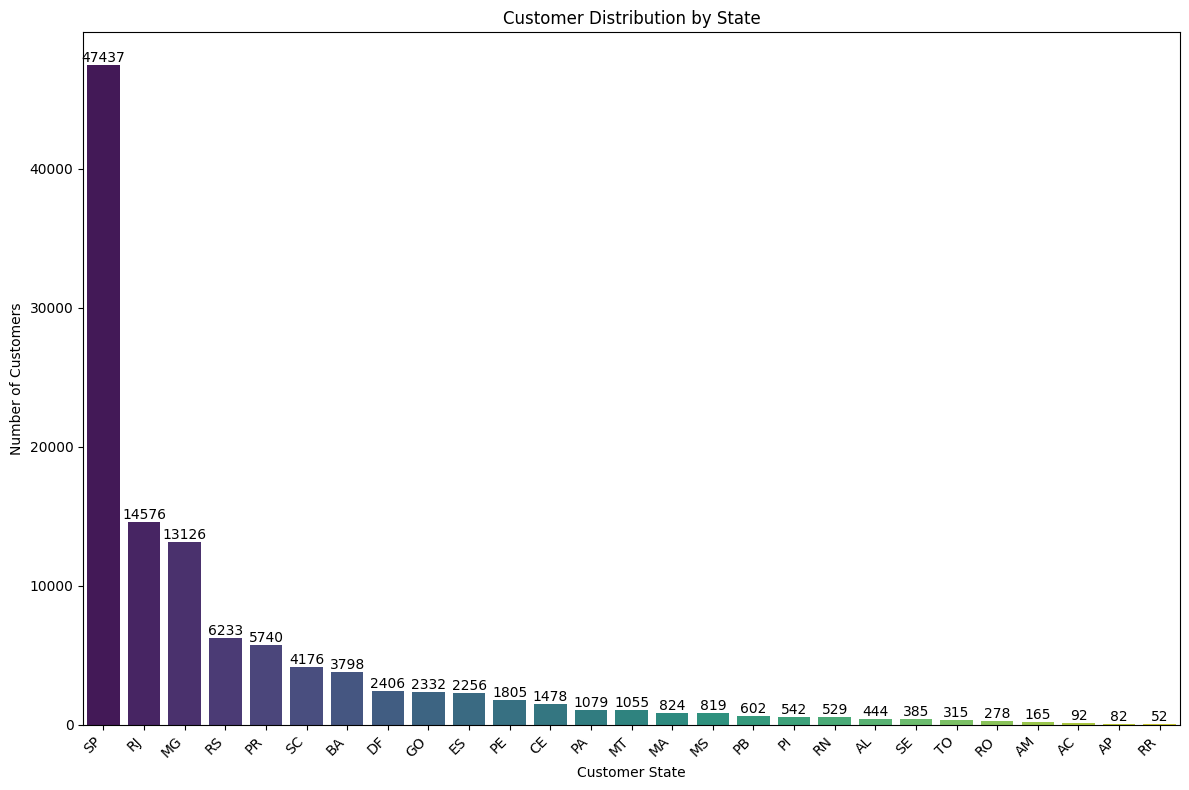

In [111]:
# Menghitung jumlah pelanggan per negara bagian
customer_state_counts = all_data['customer_state'].value_counts().reset_index()
customer_state_counts.columns = ['Customer State', 'Number of Customers']

# Mengurutkan berdasarkan jumlah pelanggan
customer_state_counts = customer_state_counts.sort_values(by='Number of Customers', ascending=False)

# Visualisasi sebaran pelanggan per negara bagian
plt.figure(figsize=(12, 8))
bars = sns.barplot(x='Customer State', y='Number of Customers', hue='Customer State', data=customer_state_counts, palette='viridis', legend=False)
plt.title('Customer Distribution by State')
plt.xlabel('Customer State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

# Menampilkan nilai pada setiap bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Clustering

Segmentasi Pelanggan Berdasarkan Jumlah Pembelian

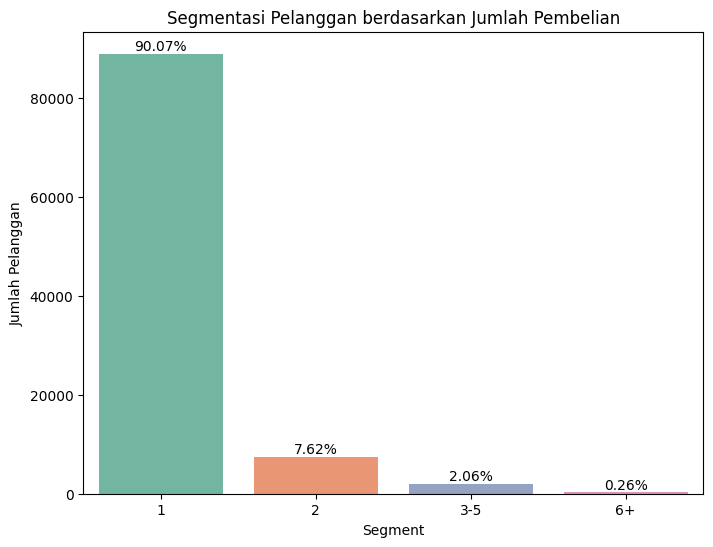

In [20]:
# Segmentasi pelanggan berdasarkan jumlah pembelian
customer_segment = pd.cut(rfm_data['frequency'], bins=[0, 1, 2, 5, np.inf], labels=['1', '2', '3-5', '6+'])
rfm_data['segment'] = customer_segment

# Menghitung jumlah pelanggan dalam setiap segment
segment_counts = rfm_data['segment'].value_counts()
total_customers = len(rfm_data)

# Menghitung persentase setiap segment
segment_percentages = (segment_counts / total_customers) * 100

# Visualisasi segmentasi pelanggan
plt.figure(figsize=(8, 6))
bars = sns.countplot(x='segment', hue='segment', data=rfm_data, palette='Set2', order=segment_counts.index, legend=False)
plt.title('Segmentasi Pelanggan berdasarkan Jumlah Pembelian')
plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')

# Menampilkan nilai persentase pada setiap bar
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{segment_percentages[i]:.2f}%', ha='center', va='bottom')

plt.show()

## Customer Churn

Pada visualisasi, sumbu **`x`** menunjukkan status churn (**1** untuk churn, **0** untuk tidak churn), sementara sumbu **`y`** menunjukkan jumlah pelanggan pada setiap kategori churn.

Nilai ***churn threshold*** adalah 30 hari sejak pembelian terakhir.

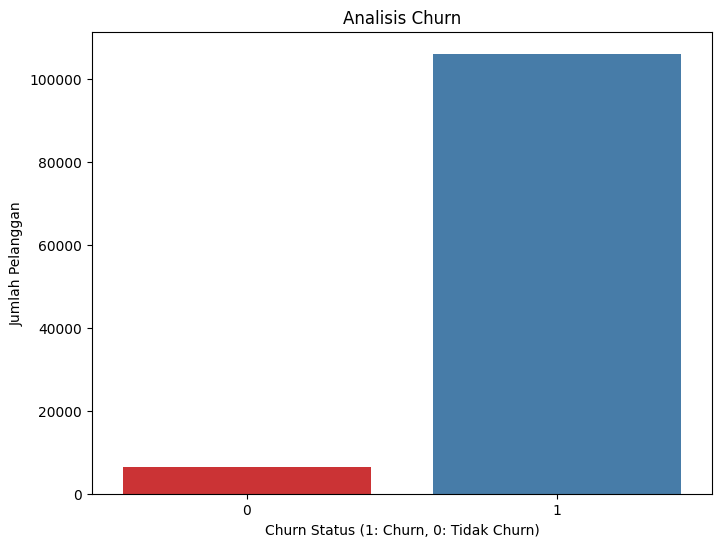

In [115]:
# Konversi kolom 'order_purchase_timestamp' menjadi tipe data datetime
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

# Menghitung tanggal terbaru dalam dataset untuk menghitung Recency
recent_date = all_data['order_purchase_timestamp'].max()

# Menghitung Recency
all_data['recency'] = (recent_date - all_data['order_purchase_timestamp']).dt.days

# Menghitung Frequency (jumlah pembelian per pelanggan)
frequency = all_data.groupby('customer_id')['order_id'].count().reset_index()
frequency.columns = ['customer_id', 'frequency']

# Menghitung Monetary (total pembelian per pelanggan)
monetary = all_data.groupby('customer_id')['price'].sum().reset_index()
monetary.columns = ['customer_id', 'monetary']

# Gabungkan hasil RFM metrics
rfm_data = pd.merge(pd.merge(frequency, monetary, on='customer_id'), all_data[['customer_id', 'recency']], on='customer_id')

# Analisis Churn
# Tentukan batas waktu untuk mengidentifikasi pelanggan churn (misalnya, 30 hari sejak pembelian terakhir)
churn_threshold = 30

# Identifikasi pelanggan churn
rfm_data['churn'] = rfm_data['recency'].apply(lambda x: 1 if x > churn_threshold else 0)

# Visualisasi Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=rfm_data, hue='churn', palette='Set1', legend=False)
plt.title('Analisis Churn')
plt.xlabel('Churn Status (1: Churn, 0: Tidak Churn)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

## Conclusion

- Pertanyaan 1: Analisis Kinerja Produk
>- Berdasarkan analisis kinerja produk, terlihat bahwa beberapa
kategori produk memiliki penjualan yang lebih tinggi dibandingkan dengan yang lain.
>- Kategori produk tertentu mungkin memiliki harga rata-rata yang lebih tinggi, tetapi hal ini tidak selalu berkorelasi langsung dengan penjualan.


- Pertanyaan 2: Evaluasi Layanan Pengiriman
>- Distribusi waktu pengiriman menunjukkan bahwa sebagian besar pengiriman dilakukan dalam jangka waktu yang diharapkan, namun terdapat juga sejumlah pengiriman yang melebihi estimasi waktu pengiriman.
>- Terdapat variasi dalam waktu pengiriman antara berbagai negara bagian pelanggan, yang menunjukkan perbedaan dalam kualitas layanan pengiriman di berbagai wilayah.


- Pertanyaan 3: Segmentasi Pelanggan
>- Segmentasi pelanggan berdasarkan kategori produk menunjukkan pola pembelian yang berbeda di antara pelanggan dari berbagai negara bagian.
>- Distribusi total pembelian per pelanggan menunjukkan bahwa sebagian besar pelanggan melakukan jumlah pembelian yang relatif sedikit, namun ada juga sejumlah pelanggan yang melakukan pembelian dalam jumlah yang lebih besar.